# Evaluating a Random Forest model

The dataset for this tutorial was created by J. A. Blackard in 1998, and it comprises over half a million observations with 54 features. Each observation represents a 30-by-30-meter tract of land in wilderness areas in Colorado. The features record cartographic data about each tract: elevation, aspect, distance to water/roads/past wildfire ignition points, amount of shade at various times of day, and which of 40 soil types it contains.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('covtype.data.gz', compression='gzip', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df.shape

(581012, 55)

In [7]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54],
      dtype='int64')

The DataFrame df contains 54 columns representing features and one column containing the target (labels) called Cover_Type. Let’s split the data up into features and target

Cover_Type (7 types)			integer		1 to 7				Forest Cover Type designation
Forest Cover Types:	
-     1 -- Spruce/Fir
-     2 -- Lodgepole Pine
-     3 -- Ponderosa Pine
-     4 -- Cottonwood/Willow
-     5 -- Aspen
-     6 -- Douglas-fir
-     7 -- Krummholz


In [17]:
y = df[54]
X = df.drop(54, axis=1)

In [18]:
y.value_counts()

54
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

The classes are pretty imbalanced — the smallest one is about 1% the size of the biggest! 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred_test = rf.predict(X_test)

### Accuracy Score

In [23]:
accuracy_score(y_test, y_pred_test)

0.9552780321232608

This model has an accuracy score of 94% on the test data. That seems pretty impressive, but remember that accuracy is not a great measure of classifier performance when the classes are imbalanced.

### Confusion Matrix

In [24]:
confusion_matrix(y_test, y_pred_test)

array([[50067,  2764,     2,     0,    18,     9,   100],
       [ 1588, 68871,   149,     1,   101,    91,    24],
       [    1,   134,  8615,    29,     7,   152,     0],
       [    0,     0,    73,   602,     0,    12,     0],
       [   24,   490,    32,     0,  1820,     7,     0],
       [    4,   120,   288,    17,     7,  3906,     0],
       [  231,    20,     0,     0,     1,     0,  4876]])

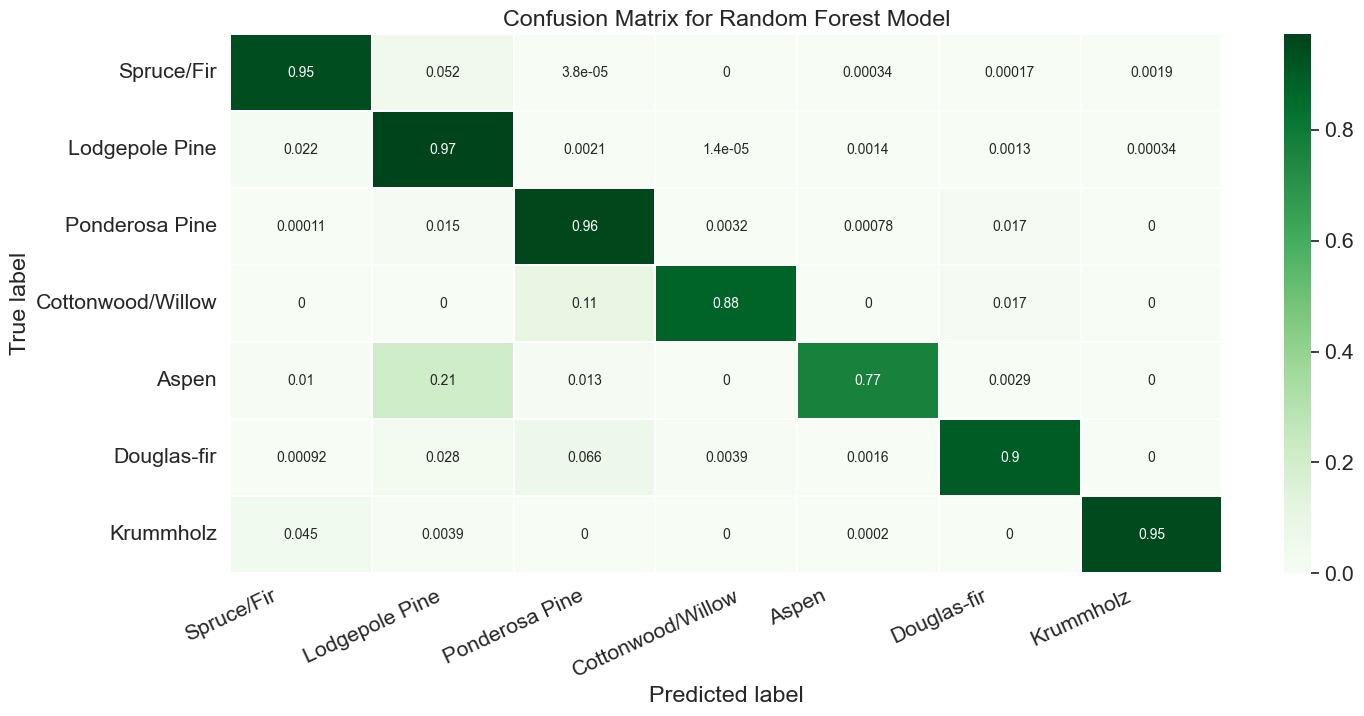

In [27]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)


class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

Classifier struggled at predicting the Aspen label. About a quarter of the time, Aspens were mislabeled as Lodgepole Pines!

### Classification Report

In [28]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.96      0.95      0.95     52960
           2       0.95      0.97      0.96     70825
           3       0.94      0.96      0.95      8938
           4       0.93      0.88      0.90       687
           5       0.93      0.77      0.84      2373
           6       0.94      0.90      0.92      4342
           7       0.98      0.95      0.96      5128

    accuracy                           0.96    145253
   macro avg       0.95      0.91      0.93    145253
weighted avg       0.96      0.96      0.96    145253



 From the metrics for class 5 (Aspen). Precision is high, meaning that the model was careful to avoid labeling things “Aspen” that aren’t Aspens. On the other hand, recall is relatively low, which means that the classifier is missing a bunch of Aspens because it is being too careful! The F1 score reflects this imbalance.